## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

## Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics
from sklearn import tree

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from time import time

## Select and Prepare the Data

In [2]:
# read the data 
data = pd.read_csv("2000'sMusic.csv")

# clean the data and drop feature(s) that will not be considered in forming conclusions 
df = data.drop(['uri'], axis =1)

## Data Exploration/Preprocessing

In [3]:
# display top 5 rows of data
display(df.head())

# explore the data
print("\n Shape: What is the shape of the data frame?")
display(df.shape)
print("\n Columns: What are the columns of the data?")
print(df.columns.values)
print("\n Null Values: Are there null values? If so, how can we deal with them?")
display(df.isnull().sum())
print("\n Describe: Key statistics regarding the data.")
display(df.describe())
print("\n Correlation: How closely correlated is the numerical data in the set?")
display(df.corr())
print("\n Info: A glance at what the data types are and other key information. ")
display(df.info())



,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1



 Shape: What is the shape of the data frame?


(5872, 18)


 Columns: What are the columns of the data?
['track' 'artist' 'danceability' 'energy' 'key' 'loudness' 'mode'
 'speechiness' 'acousticness' 'instrumentalness' 'liveness' 'valence'
 'tempo' 'duration_ms' 'time_signature' 'chorus_hit' 'sections' 'target']

 Null Values: Are there null values? If so, how can we deal with them?


track               0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


 Describe: Key statistics regarding the data.


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000
mean,0.542931,0.694511,5.276396,-7.449258,0.645095,0.092360,0.214374,0.150917,0.196141,0.482262,121.613018,2.581706e+05,3.913999,40.734295,11.056880,0.500000
std,0.190003,0.237792,3.564153,5.102543,0.478525,0.094997,0.296511,0.301452,0.161965,0.254567,30.179885,1.395341e+05,0.404280,20.245637,5.758186,0.500043
min,0.058800,0.000348,0.000000,-47.327000,0.000000,0.022400,0.000000,0.000000,0.019300,0.000000,46.755000,1.592000e+04,0.000000,0.000000,1.000000,0.000000
25%,0.416000,0.567000,2.000000,-8.315000,0.000000,0.036175,0.004552,0.000000,0.093700,0.278000,96.984000,2.068130e+05,4.000000,27.507508,9.000000,0.000000
50%,0.556000,0.744000,5.000000,-6.041500,1.000000,0.052700,0.060300,0.000022,0.131000,0.486000,119.999000,2.380065e+05,4.000000,36.037160,10.000000,0.500000
75%,0.681000,0.885000,8.000000,-4.562500,1.000000,0.107000,0.312000,0.047275,0.263000,0.687000,141.495250,2.791600e+05,4.000000,47.889570,12.000000,1.000000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.950000,0.996000,0.998000,0.987000,0.982000,213.233000,4.170227e+06,5.000000,262.615400,169.000000,1.000000



 Correlation: How closely correlated is the numerical data in the set?


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.074201,0.019733,0.292798,-0.037738,0.164758,-0.184268,-0.335961,-0.113007,0.591426,-0.141072,-0.075976,0.183014,-0.083784,-0.053724,0.458550
energy,0.074201,1.000000,0.011642,0.775731,-0.008436,0.137077,-0.743515,-0.229903,0.206668,0.286406,0.221466,-0.144524,0.164477,-0.016899,-0.167458,0.084521
key,0.019733,0.011642,1.000000,0.001610,-0.148303,0.028565,-0.012443,0.002935,-0.020165,0.016495,0.004066,0.019962,-0.003832,-0.005687,0.007625,-0.004444
loudness,0.292798,0.775731,0.001610,1.000000,0.030354,0.096448,-0.684910,-0.441705,0.120931,0.336110,0.162579,-0.164971,0.192721,-0.062935,-0.170696,0.347300
mode,-0.037738,-0.008436,-0.148303,0.030354,1.000000,-0.062829,0.011798,-0.079606,0.011895,-0.011184,0.022168,-0.034388,0.024453,-0.039702,-0.016842,0.096097
speechiness,0.164758,0.137077,0.028565,0.096448,-0.062829,1.000000,-0.059198,-0.123527,0.141157,0.147927,-0.017618,0.017786,0.031691,-0.012479,0.023737,0.057114
acousticness,-0.184268,-0.743515,-0.012443,-0.684910,0.011798,-0.059198,1.000000,0.255473,-0.099947,-0.187287,-0.157567,0.135808,-0.180854,0.015188,0.156490,-0.223842
instrumentalness,-0.335961,-0.229903,0.002935,-0.441705,-0.079606,-0.123527,0.255473,1.000000,-0.049933,-0.334772,-0.031231,0.166849,-0.104313,0.092206,0.121436,-0.471290
liveness,-0.113007,0.206668,-0.020165,0.120931,0.011895,0.141157,-0.099947,-0.049933,1.000000,-0.013835,0.041468,-0.022631,0.021770,0.021775,-0.034278,-0.075539
valence,0.591426,0.286406,0.016495,0.336110,-0.011184,0.147927,-0.187287,-0.334772,-0.013835,1.000000,0.022010,-0.140885,0.155660,-0.078661,-0.096823,0.281006



 Info: A glance at what the data types are and other key information. 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5872 non-null   object 
 1   artist            5872 non-null   object 
 2   danceability      5872 non-null   float64
 3   energy            5872 non-null   float64
 4   key               5872 non-null   int64  
 5   loudness          5872 non-null   float64
 6   mode              5872 non-null   int64  
 7   speechiness       5872 non-null   float64
 8   acousticness      5872 non-null   float64
 9   instrumentalness  5872 non-null   float64
 10  liveness          5872 non-null   float64
 11  valence           5872 non-null   float64
 12  tempo             5872 non-null   float64
 13  duration_ms       5872 non-null   int64  
 14  time_signature    5872 non-null   int64  
 15  chorus_hit       

None

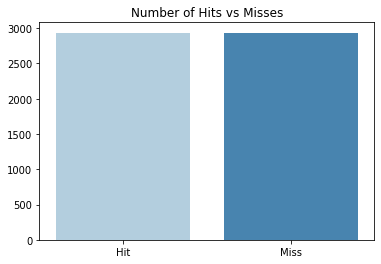

Baseline Accuracy =  0.5
2936
2936


In [4]:
# get the distribution of the target variable using barplot: `target`
sns.barplot(x=["Hit", "Miss"],
            y=[len(df.loc[df["target"] == 1]),
               len(df.loc[df["target"] == 0])], palette="Blues")
plt.title("Number of Hits vs Misses")
plt.show()

# partition data into training and testing sets with test size - 30%
X = df.iloc[:,2:-1] # all numerical data, excluding the artist and song name
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify = y, random_state = 42)

# find baseline accuracy                                            
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", baseline_acc)

# check baseline accuracy, results in the same number of hits and misses
print(len(df[df['target']==0]))
print(len(df[df['target']==1]))

## Modeling

**Logistic Regression** 

Logistic Regression Accuracy =  0.5022701475595914
Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.58      0.54       881
           1       0.50      0.43      0.46       881

    accuracy                           0.50      1762
   macro avg       0.50      0.50      0.50      1762
weighted avg       0.50      0.50      0.50      1762

[[507 374]
 [503 378]]


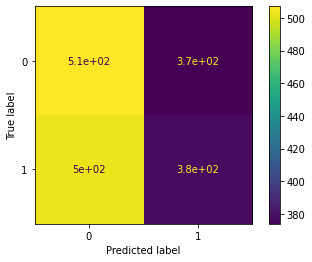

In [5]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
pred_lr = LogReg.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)
print('Logistic Regression Accuracy = ', acc_lr)

print('Classification Report:\n')
print(classification_report(y_test, pred_lr))

cnf_matrix = metrics.confusion_matrix(y_test,pred_lr)
print(cnf_matrix)

plot_confusion_matrix(LogReg, X_test,y_test)
plt.show()

**Decision Tree**

Decision Tree Accuracy = 0.8099290780141843


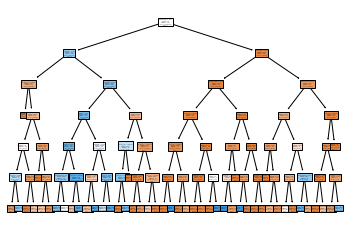

Feature Importance: [0.16329684 0.05961288 0.         0.06391799 0.         0.01514564
 0.06545791 0.54851907 0.0101278  0.00921486 0.00243357 0.06227345
 0.         0.         0.        ]
                   0         1
0       danceability  0.163297
1             energy  0.059613
2                key  0.000000
3           loudness  0.063918
4               mode  0.000000
5        speechiness  0.015146
6       acousticness  0.065458
7   instrumentalness  0.548519
8           liveness  0.010128
9            valence  0.009215
10             tempo  0.002434
11       duration_ms  0.062273
12    time_signature  0.000000
13        chorus_hit  0.000000
14          sections  0.000000


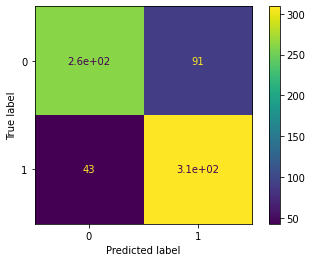

[[262  91]
 [ 43 309]]
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       353
           1       0.77      0.88      0.82       352

    accuracy                           0.81       705
   macro avg       0.82      0.81      0.81       705
weighted avg       0.82      0.81      0.81       705



In [20]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=2020)
dt.fit(X_train, y_train)
pred_tree = dt.predict(X_test)
print('Decision Tree Accuracy =', metrics.accuracy_score(y_test, pred_tree))
acc_dt = metrics.accuracy_score(y_test, pred_tree)

# display the tree
plt.figure(2)
fn = X.columns
classList = str(dt.classes_.tolist())
displayTree = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

# look into the most important features
print('Feature Importance:', dt.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
print(imp)

# plot confusion matrix
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

# print confusion matrix
cf = metrics.confusion_matrix(y_test, pred_tree)
print(cf)

print('Classification Report:\n')
print(classification_report(y_test, pred_tree))

**Bagging**

In [7]:
model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)
print('Bagging Accuracy = ', acc_bagging)

print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Bagging Accuracy =  0.8410896708286039
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       881
           1       0.84      0.85      0.84       881

    accuracy                           0.84      1762
   macro avg       0.84      0.84      0.84      1762
weighted avg       0.84      0.84      0.84      1762



**Random Forest**

In [8]:
model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
print('Random Forest Accuracy = ', acc_rf)

feature_importances = model_rf.feature_importances_
features = X_train.columns
dfOfRfImp = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest(3, 'importance')
print("\n",dfOfRfImp)

print('Classification Report:\n')
print(classification_report(y_test, pred_rf))

Random Forest Accuracy =  0.8615209988649262

             features  importance
7   instrumentalness    0.283262
0       danceability    0.140798
11       duration_ms    0.093379
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       881
           1       0.84      0.90      0.87       881

    accuracy                           0.86      1762
   macro avg       0.86      0.86      0.86      1762
weighted avg       0.86      0.86      0.86      1762



**Voting**

In [9]:
# Ensemble of several different types of
rfClf = RandomForestClassifier() 
dtClf = DecisionTreeClassifier()
svmClf = SVC(probability=True)
logClf = LogisticRegression()

# constructing the ensemble classifier by mentioning the individual classifiers.
votingClf = VotingClassifier(estimators = [('rf',rfClf), ('dt',dtClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

# train the ensemble classifier
votingClf.fit(X_train, y_train)

votingClf_pred = votingClf.predict(X_test)
acc_voting = accuracy_score(y_test, votingClf_pred) 
print('Voting Accuracy = ', acc_voting)

print('Classification Report:\n')
print(classification_report(y_test, votingClf_pred))

Voting Accuracy =  0.79738933030647
Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       881
           1       0.79      0.81      0.80       881

    accuracy                           0.80      1762
   macro avg       0.80      0.80      0.80      1762
weighted avg       0.80      0.80      0.80      1762



**AdaBoost (Boosting)**

In [10]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
pred_boost = ada_boost.predict(X_test)
acc_boost = accuracy_score(y_test, pred_boost)
print('AdaBoost Accuracy = ', acc_boost)

print('Classification Report:\n')
print(classification_report(y_test, pred_boost))

AdaBoost Accuracy =  0.843927355278093
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       881
           1       0.82      0.88      0.85       881

    accuracy                           0.84      1762
   macro avg       0.85      0.84      0.84      1762
weighted avg       0.85      0.84      0.84      1762



**Gradient Boosted Trees (Boosting)**

In [11]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
acc_gbc = accuracy_score(y_test, pred_gbc)
print('Gradient Boost Accuracy = ', acc_gbc)

print('Classification Report:\n')
print(classification_report(y_test, pred_gbc))

Gradient Boost Accuracy =  0.8677639046538025
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       881
           1       0.84      0.91      0.87       881

    accuracy                           0.87      1762
   macro avg       0.87      0.87      0.87      1762
weighted avg       0.87      0.87      0.87      1762



## Find the Most Accurate Model 

In [12]:
mostAccurateDict = {'LogisticRegression': acc_lr, 'Decision Tree': metrics.accuracy_score(y_test, pred_tree), 'Bagging': acc_bagging, 'Random Forest': acc_rf, 'Voting': acc_voting,'AdaBoost': acc_boost, 'GBC': acc_gbc}
mostAccurateModel = max(mostAccurateDict, key = mostAccurateDict.get)
print("Most Accurate Model: ", mostAccurateModel)

Most Accurate Model:  GBC


## Cross Validation

In [13]:
# Use cross validation to fine tune the model’s parameters
# Partition the data one more time to get a different sample (to get a validation set)

X_value, X_test, y_value, y_test = train_test_split(X_test, y_test, test_size=0.4, stratify = y_test, random_state = 42)


model_gbc = GradientBoostingClassifier().fit(X_train, y_train)
pred_gbc = model_gbc.predict(X_value)
score =  cross_val_score(model_gbc, X_value, y_value, cv=10, scoring='accuracy')
mean = score.mean()
print("Cross Validation Score: ", mean)


# Fine tune the learning rate
learningRate = []
for i in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:
    gbc1 = GradientBoostingClassifier(learning_rate=i)
    gbc1 = gbc1.fit(X_train,y_train)
    crossvalscore1 = cross_val_score(estimator=gbc1, X=X_value, y=y_value, cv=10)
    learningRate.append((i,crossvalscore1.mean()))

print(learningRate)

# Best learning rate is .1
model_gbc = GradientBoostingClassifier(learning_rate=.1).fit(X_train, y_train)
pred_gbc = model_gbc.predict(X_value)
score =  cross_val_score(model_gbc, X_value, y_value, cv=10, scoring='accuracy')
mean = score.mean()
print("Cross Validation Score After Fine Tuning the Model's Learning Rate: ", mean)

Cross Validation Score:  0.8514734950584009
[(0.1, 0.8514734950584009), (0.2, 0.8495956873315362), (0.3, 0.8496226415094339), (0.4, 0.8448876909254267), (0.5, 0.8439353099730459), (0.6, 0.8353908355795149), (0.7, 0.8353099730458222), (0.8, 0.8410512129380054), (0.9, 0.8268643306379155)]
Cross Validation Score After Fine Tuning the Model's Learning Rate:  0.8514824797843668


## Simplify Model

In [14]:
# Simplify your model to avoid overfitting

# increase min_samples_split
# increase min_samples_leaf

samplesSplit = [] #default 2
for i in range(2,11):
    gbc2 = GradientBoostingClassifier(min_samples_split=i)
    gbc2 = gbc1.fit(X_train,y_train)
    crossvalscore2 = cross_val_score(estimator=gbc2, X=X_value, y=y_value, cv=10)
    samplesSplit.append((i,crossvalscore2.mean()))

print(samplesSplit)

# Best min_samples_split is 4


samplesLeaf = [] #default 1
for i in range(1,11):
    gbc3 = GradientBoostingClassifier(min_samples_split=i)
    gbc3 = gbc1.fit(X_train,y_train)
    crossvalscore3 = cross_val_score(estimator=gbc3, X=X_value, y=y_value, cv=10)
    samplesLeaf.append((i,crossvalscore3.mean()))

print(samplesLeaf)

# Best min_samples_leaf is 8


[(2, 0.8259209344115005), (3, 0.8287511230907457), (4, 0.8268643306379155), (5, 0.8268643306379155), (6, 0.8259209344115005), (7, 0.8249775381850855), (8, 0.8278077268643307), (9, 0.8268643306379155), (10, 0.8278077268643307)]
[(1, 0.8278077268643307), (2, 0.8259209344115005), (3, 0.8240341419586704), (4, 0.8259209344115005), (5, 0.8249775381850852), (6, 0.8259209344115005), (7, 0.8268643306379155), (8, 0.8259209344115005), (9, 0.8249775381850855), (10, 0.8259209344115005)]


**OPTIMAL MODEL WITH BEST ACCURACY**

In [17]:
time1 = time()
gbc = GradientBoostingClassifier(learning_rate=.1,min_samples_leaf=8, min_samples_split=4).fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
acc_gbc = accuracy_score(y_test, pred_gbc)
print('Gradient Boost Accuracy = ', acc_gbc)

print('Classification Report:\n')
print(classification_report(y_test, pred_gbc))
print("Testing Time (in minutes) = %f" % ((time() - time1) / 60))

feature_importances = gbc.feature_importances_
features = X_train.columns
dfOfGBCImp = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest(3, 'importance')
print("\n",dfOfGBCImp)


Gradient Boost Accuracy =  0.8638297872340426
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       353
           1       0.84      0.90      0.87       352

    accuracy                           0.86       705
   macro avg       0.87      0.86      0.86       705
weighted avg       0.87      0.86      0.86       705

Testing Time (in minutes) = 0.027808

             features  importance
7   instrumentalness    0.510793
0       danceability    0.137012
11       duration_ms    0.105944


## Interesting Findings 

In [16]:
# On average, what would a hit song require? 
df[df.target == 1].mean()

danceability             0.630049
energy                   0.714608
key                      5.260559
loudness                -5.677296
mode                     0.691076
speechiness              0.097785
acousticness             0.148008
instrumentalness         0.008858
liveness                 0.183907
valence                  0.553791
tempo                  120.283592
duration_ms         238862.943801
time_signature           3.970027
chorus_hit              38.843723
sections                10.476839
target                   1.000000
dtype: float64

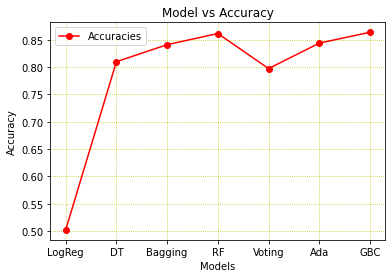

In [21]:
# Visualize and compare the accuracy of the Gradient Boosting Classifer to other ensembles we tested
models = ["LogReg", "DT", "Bagging", "RF","Voting", "Ada","GBC"]
accuracies = [acc_lr, acc_dt,acc_bagging,  acc_rf,acc_voting,acc_boost, acc_gbc]

plt.plot(models, accuracies, marker ='o', linestyle='-', color = 'r', label='Accuracies')

# Add labels
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add title
plt.title('Model vs Accuracy')

# Control axes range

# legend and grid
plt.legend()
plt.grid(True, color='y', linestyle=':')

plt.show()